<h3>ARTIFICIAL NEURAL NETWORKS



Artificial Neural Networks (ANNs) are a fundamental concept in deep learning and form the basis for many advanced techniques, including deep learning. ANNs are computational models inspired by the structure and functioning of the human brain. They consist of interconnected nodes, or "neurons," organized in layers, each layer having a specific role in the network's computation.

In this project, the ANN serves as the core model used to perform classification. The ANN consists of multiple layers of interconnected nodes (neurons) that process input data, learn patterns, and make predictions. Each layer consists of neurons that apply activation functions to their inputs and pass the results to the next layer. The architecture of the ANN, including the number of layers, neurons per layer, and activation functions, defines its ability to capture complex relationships in the data.



**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import os

**Using the pandas library to read a CSV file**

In [ ]:
df = pd.read_csv('mps.csv')

**Displaying the first 10 rows**

In [ ]:
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


First 10 rows of your DataFrame, which contains various features (attributes) of mobile phones.The last column, price_range, represent the price range of the mobile phone.

Each row represents a different mobile phone, and each column represents a specific attribute of that phone. The values in each cell represent the corresponding attribute's value for that particular phone.

In [ ]:
#displaying a summary of the DataFrame's basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
#Finding the unique values
print(np.unique(df['price_range']))

[0 1 2 3]


In [ ]:
#Summary of basic statistical information about the numerical columns
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
# Lets Divide the data to input and target
X = df.iloc[:,0:20]
y = df.iloc[:,-1]

**Creating feature and target variables**

In [ ]:
# Lets do some Feature Selection for better results and accuracy
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

<h3>In this specific case, the SelectKBest class is used to select the top K features based on a scoring function. The scoring function quantifies the relevance or importance of each feature with respect to the target variable. The higher the score, the more relevant the feature is expected to be for predicting the target variable.

In [ ]:
#Performing feature selection using the chi-squared (chi2) statistical test.
kbest = SelectKBest(chi2,k=10)

In [ ]:
#Fitting the SelectKBest instance kbest to your feature matrix X and target vector y.
best_feaures = kbest.fit(X,y)

In [ ]:
best_feaures.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

These scores indicate the strength of the relationship between each feature and the target variable.

In [ ]:
#Creating two new DataFrames
df_features = pd.DataFrame(best_feaures.scores_)
df_columns = pd.DataFrame(X.columns)

In [ ]:
#Combining the Dataframes
featureScores = pd.concat([df_columns,df_features],axis=1)

In [ ]:
#Renaming the Columns
featureScores.columns = ['Features','Score']

In [ ]:
featureScores.sort_values(by='Score',ascending=False)

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


In [ ]:
#Created a new DataFrame X containing a subset of columns from the original DataFrame df.
X = df[['ram','px_height','battery_power','px_width','mobile_wt','int_memory','sc_w','talk_time','fc','sc_h']]

In [ ]:
X

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,talk_time,fc,sc_h
0,2549,20,842,756,188,7,7,19,1,9
1,2631,905,1021,1988,136,53,3,7,0,17
2,2603,1263,563,1716,145,41,2,9,2,11
3,2769,1216,615,1786,131,10,8,11,0,16
4,1411,1208,1821,1212,141,44,2,15,13,8
...,...,...,...,...,...,...,...,...,...,...
1995,668,1222,794,1890,106,2,4,19,0,13
1996,2032,915,1965,1965,187,39,10,16,0,11
1997,3057,868,1911,1632,108,36,1,5,1,9
1998,869,336,1512,670,145,46,10,19,4,18


In [ ]:
#Converting feature and target variables from DataFrames to NumPy arrays using the values attribute.
X = X.values
y = y.values

In [ ]:
#Displaying the shapes
print(X.shape,y.shape)

(2000, 10) (2000,)


## Normalisation and Scaling

In [ ]:
# lets do some normalisation and scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
#Reshape target vector y into a 2D array with a single column.
y = y.reshape(-1,1)

<h3>The code utilizes the OneHotEncoder class from sklearn.preprocessing to perform one-hot encoding on a categorical target variable y. One-hot encoding converts categorical data into a binary matrix representation, aiding machine learning algorithms. An instance of the encoder is created, and the fit_transform method is applied to y, resulting in the transformed one-hot encoded matrix.

In [ ]:
# Now converting y labels to one hot encoder
from sklearn.preprocessing import OneHotEncoder
ohot = OneHotEncoder()
y = ohot.fit_transform(y)

In [ ]:
y = y.toarray()

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)


# Neural network Model

<h3>A neural network model, often simply referred to as a neural network, is a computational framework inspired by the way biological neural networks, such as the human brain, work. It's used for solving complex machine learning and artificial intelligence tasks, particularly tasks that involve pattern recognition, classification, regression, and other data-driven predictions.

<h3>At its core, a neural network consists of interconnected units called neurons or nodes, organized into layers. Each neuron takes in input data, processes it using certain mathematical operations, and produces an output. The outputs from one layer become inputs for the next layer, allowing the network to learn hierarchical representations of patterns and relationships in the data.

<h3>The ANN is constructed using the Keras library, a popular deep learning framework. The ANN is defined using the Sequential model in Keras, where you add layers sequentially to build the model's architecture. We defined various layers such as dense layers (fully connected layers), dropout layers (to prevent overfitting), batch normalization layers (to stabilize training), and activation functions (e.g., ReLU and softmax).

In [ ]:
#Importing the necessary libraries and modules for creating a neural network using Keras
import keras
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt
%matplotlib inline

<h3>Neural network model follows a sequential architecture, where information flows through different layers in a linear fashion. It begins with an input layer comprising 8 neurons and utilizes the ReLU activation function, enhancing the model's capacity to capture complex relationships in the data. The input dimension for this layer is 10, suggesting that the model expects input with 10 distinct features. The subsequent hidden layer, with 6 neurons and ReLU activation, continues to extract intricate patterns from the data. Finally, the output layer, featuring 4 neurons, implements the softmax activation function, which normalizes the outputs into a probability distribution over 4 classes.

In [ ]:
#Defining a feedforward neural network model using Keras with three layers
model = Sequential()
model.add(Dense(8,activation='relu',input_dim = 10))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 88        
                                                                 
 dense_1 (Dense)             (None, 6)                 54        
                                                                 
 dense_2 (Dense)             (None, 4)                 28        
                                                                 
Total params: 170
Trainable params: 170
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Setting up the compilation of neural network model using Keras.
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

<h3>The ANN is compiled with a loss function (categorical cross-entropy) that quantifies the difference between predicted and actual labels. The optimization algorithm (Adam) adjusts the model's parameters during training to minimize the loss. Metrics like accuracy are used to measure the model's performance during training and evaluation.

In [ ]:
#Training neural network model
history = model.fit(X_train,y_train,epochs=105,validation_data=(X_test,y_test),batch_size=64)

Epoch 1/105
25/25 [==============================] - 1s 8ms/step - loss: 1.4379 - accuracy: 0.2244 - val_loss: 1.4263 - val_accuracy: 0.2300
Epoch 2/105
25/25 [==============================] - 0s 2ms/step - loss: 1.4116 - accuracy: 0.2456 - val_loss: 1.4159 - val_accuracy: 0.2475
Epoch 3/105
25/25 [==============================] - 0s 2ms/step - loss: 1.3952 - accuracy: 0.2631 - val_loss: 1.4087 - val_accuracy: 0.2500
Epoch 4/105
25/25 [==============================] - 0s 2ms/step - loss: 1.3823 - accuracy: 0.2756 - val_loss: 1.4006 - val_accuracy: 0.2425
Epoch 5/105
25/25 [==============================] - 0s 2ms/step - loss: 1.3680 - accuracy: 0.2975 - val_loss: 1.3891 - val_accuracy: 0.2500
Epoch 6/105
25/25 [==============================] - 0s 2ms/step - loss: 1.3492 - accuracy: 0.3425 - val_loss: 1.3704 - val_accuracy: 0.2925
Epoch 7/105
25/25 [==============================] - 0s 2ms/step - loss: 1.3206 - accuracy: 0.3938 - val_loss: 1.3439 - val_accuracy: 0.3600
Epoch 8/105
2

In [ ]:
# Post-processing steps on the predicted and actual test labels
y_pred = model.predict(X_test)

#lets do the inverse one hot encoding
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

# also inverse encoding for y_test labels

test = []
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

13/13 [==============================] - 0s 833us/step


Evaluation was performed on 13 batches, each containing one or more samples, and each evaluation step took around 833 microseconds.

In [ ]:
# accuracy of the model
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred,test)
print("Accuracy of Your Model is = " + str(acc*100))

Accuracy of Your Model is = 94.0


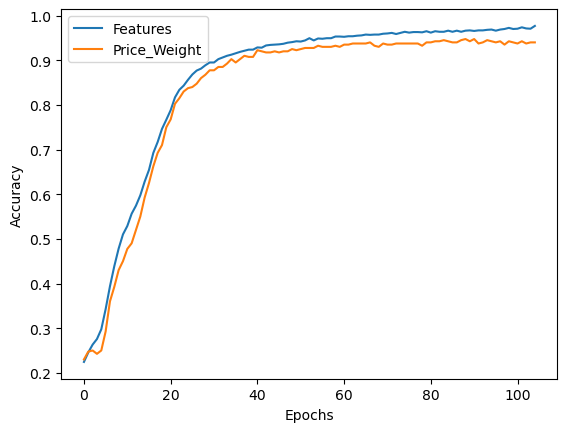

In [ ]:
#Visualizing the training progress of neural network model.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Features','Price_Weight'],loc='upper left')
plt.show()

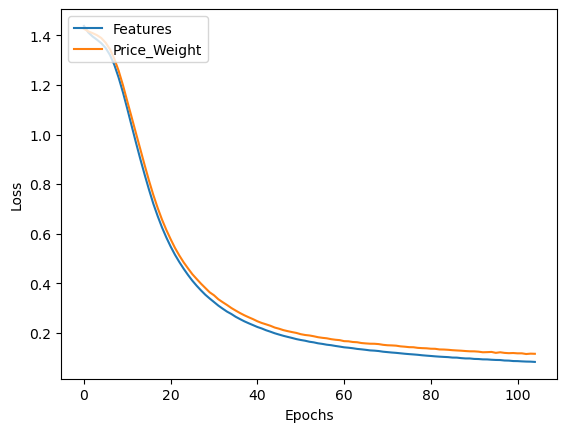

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Features','Price_Weight'],loc='upper left')
plt.show()

# Model 2

In [ ]:
# Importing the necessary libraries and modules for creating a neural network using Keras
import keras
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Created a new instance of a Sequential model
model_2 = Sequential()

<h3>The model begins with an input layer consisting of 64 neurons, each employing the Rectified Linear Unit (ReLU) activation function. This layer processes data with 10 features. After each subsequent dense layer, a Batch Normalization layer is introduced to stabilize and speed up training. To prevent overfitting, a Dropout layer with a dropout rate of 0.2 follows the Batch Normalization layer.

In [ ]:
model_2.add(Dense(64, activation='relu', input_dim=10))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.2))

model_2.add(Dense(48, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.2))

model_2.add(Dense(32, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.2))

model_2.add(Dense(24, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.2))

model_2.add(Dense(16, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.2))

model_2.add(Dense(8, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.2))

model_2.add(Dense(4, activation='softmax'))

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                704       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 48)                3120      
                                                                 
 batch_normalization_1 (Batc  (None, 48)               192       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 48)               

In [ ]:
# Compiling model 2
model_2.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
# Training model 2 neural network
history = model_2.fit(X_train,y_train,epochs=105,validation_data=(X_test,y_test),batch_size=64)

Epoch 1/105
25/25 [==============================] - 2s 12ms/step - loss: 1.8613 - accuracy: 0.2719 - val_loss: 1.3820 - val_accuracy: 0.2425
Epoch 2/105
25/25 [==============================] - 0s 4ms/step - loss: 1.6902 - accuracy: 0.3019 - val_loss: 1.3702 - val_accuracy: 0.3500
Epoch 3/105
25/25 [==============================] - 0s 3ms/step - loss: 1.5689 - accuracy: 0.3219 - val_loss: 1.3488 - val_accuracy: 0.3600
Epoch 4/105
25/25 [==============================] - 0s 3ms/step - loss: 1.4737 - accuracy: 0.3462 - val_loss: 1.3187 - val_accuracy: 0.4200
Epoch 5/105
25/25 [==============================] - 0s 3ms/step - loss: 1.3651 - accuracy: 0.3850 - val_loss: 1.2719 - val_accuracy: 0.4725
Epoch 6/105
25/25 [==============================] - 0s 3ms/step - loss: 1.3254 - accuracy: 0.4038 - val_loss: 1.2173 - val_accuracy: 0.5025
Epoch 7/105
25/25 [==============================] - 0s 4ms/step - loss: 1.2397 - accuracy: 0.4263 - val_loss: 1.1317 - val_accuracy: 0.5575
Epoch 8/105


In [ ]:
# Post-processing steps on the predicted and actual test labels
y_pred = model_2.predict(X_test)

#lets do the inverse one hot encoding
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

# also inverse encoding for y_test labels

test = []
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

13/13 [==============================] - 0s 1ms/step


In [ ]:
# accuracy of the model
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred,test)
print("Accuracy of Your Model is = " + str(acc*100))

Accuracy of Your Model is = 95.0


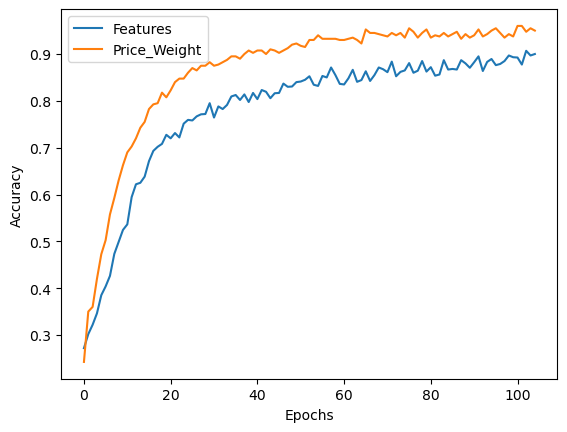

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Features','Price_Weight'],loc='upper left')
plt.show()

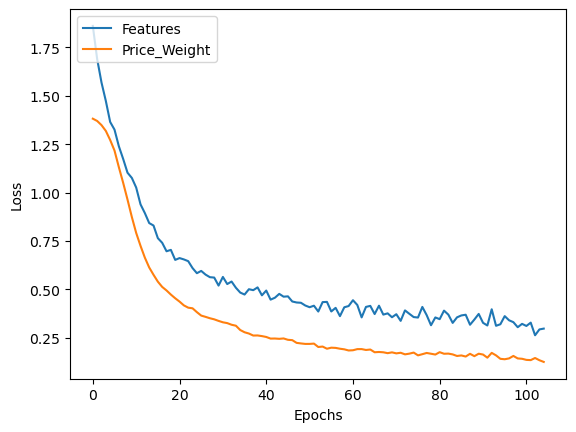

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Features','Price_Weight'],loc='upper left')
plt.show()

# Model 3

<h3>The model begins with a dense layer comprising 16 neurons and employs the ReLU activation function, facilitating the extraction of complex patterns from the input data. A dropout layer with a rate of 0.2 is introduced after this to mitigate overfitting by randomly deactivating 20% of the neurons during training. The subsequent layers continue this pattern with dense layers of 12 and 8 neurons, each followed by ReLU activation and dropout layers. The model incorporates batch normalization after the third dense layer, promoting more stable and efficient training by normalizing the activations. Finally, the output layer consists of 4 neurons using the softmax activation function, suitable for multi-class classification tasks.

In [ ]:
# Defining a new neural network architecture
model_3 = Sequential()
model_3.add(Dense(16, activation='relu', input_dim=10))
model_3.add(Dropout(0.2))
model_3.add(Dense(12, activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(8, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dense(4, activation='softmax'))

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                176       
                                                                 
 dropout_6 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 12)                204       
                                                                 
 dropout_7 (Dropout)         (None, 12)                0         
                                                                 
 dense_12 (Dense)            (None, 8)                 104       
                                                                 
 batch_normalization_6 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                      

In [ ]:
model_3.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model_3.fit(X_train,y_train,epochs=105,validation_data=(X_test,y_test),batch_size=64)

Epoch 1/105
25/25 [==============================] - 1s 8ms/step - loss: 1.6650 - accuracy: 0.2612 - val_loss: 1.3716 - val_accuracy: 0.3025
Epoch 2/105
25/25 [==============================] - 0s 3ms/step - loss: 1.5303 - accuracy: 0.3075 - val_loss: 1.3511 - val_accuracy: 0.3475
Epoch 3/105
25/25 [==============================] - 0s 2ms/step - loss: 1.4027 - accuracy: 0.3325 - val_loss: 1.3272 - val_accuracy: 0.3725
Epoch 4/105
25/25 [==============================] - 0s 2ms/step - loss: 1.3374 - accuracy: 0.3537 - val_loss: 1.3001 - val_accuracy: 0.4250
Epoch 5/105
25/25 [==============================] - 0s 2ms/step - loss: 1.2656 - accuracy: 0.3913 - val_loss: 1.2700 - val_accuracy: 0.4625
Epoch 6/105
25/25 [==============================] - 0s 2ms/step - loss: 1.2195 - accuracy: 0.4456 - val_loss: 1.2306 - val_accuracy: 0.4850
Epoch 7/105
25/25 [==============================] - 0s 3ms/step - loss: 1.1653 - accuracy: 0.4613 - val_loss: 1.1796 - val_accuracy: 0.5400
Epoch 8/105
2

In [ ]:
# Post-processing steps on the predicted and actual test labels
y_pred = model_3.predict(X_test)

#lets do the inverse one hot encoding
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

# also inverse encoding for y_test labels

test = []
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

13/13 [==============================] - 0s 914us/step


In [ ]:
# Accuracy of the model
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred,test)
print("Accuracy of Your Model is = " + str(acc*100))

Accuracy of Your Model is = 94.0


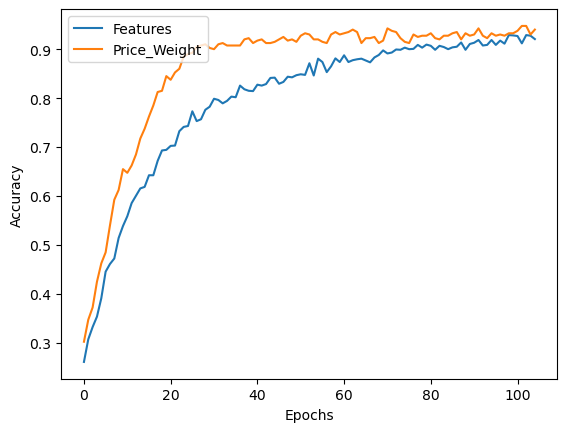

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Features','Price_Weight'],loc='upper left')
plt.show()

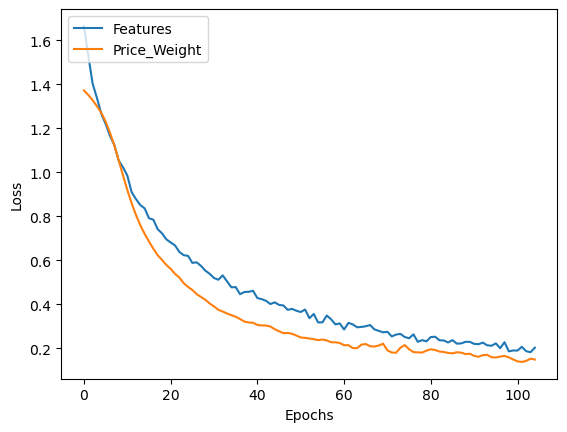

In [ ]:
# Creating a plot that visualizes the training loss and validation loss over epochs.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Features','Price_Weight'],loc='upper left')
plt.show()

<h3>Conclusion:
Implemented 3 Models of ANN accordingly for our Mobile Price prediction project in which the model provided an accuracy of 95% and then the other two gave an accuracy of 94%.
Model performance can be influenced by various factors including architecture, data preprocessing, hyperparameters, and the nature of the dataset itself. In this case, the second model might have found a good balance between complexity and regularization techniques like dropout and batch normalization, which helped prevent overfitting and improved its ability to generalize to new data.
This, often highlights the fact that multiple architectures can yield similar results on a particular dataset. However, even subtle differences in performance might be significant depending on the specific problem we're tackling.